<a href="https://colab.research.google.com/github/nioke-dev/PCVK_Genap_2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tugas Praktikum**


1. Buat Gamma Correction sesuai dengan petunjuk berikut

In [6]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Gamma Correction pada citra 
-----------------------------
Masukkan nilai Gamma: 3


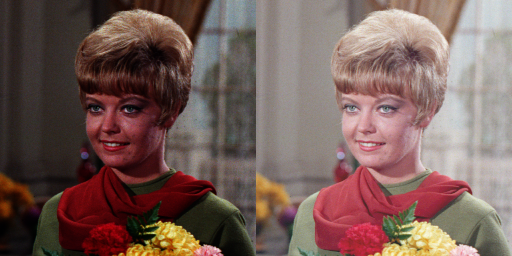

In [7]:
from __future__ import print_function
import numpy as np
import argparse
import cv2 as cv
from google.colab.patches import cv2_imshow

female1 = cv.imread('/content/drive/MyDrive/Colab Notebooks/Assets/female.tiff')

imgTgs1 = female1.copy()

def adjust_gamma(image, gamma=1.0):
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	return cv.LUT(image, table)

print(' Gamma Correction pada citra ')
print('-----------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

adjusted = adjust_gamma(image=imgTgs1, gamma=gamma)
cv2_imshow(np.hstack([imgTgs1, adjusted]))

2. Buat Simulasi Image Depth

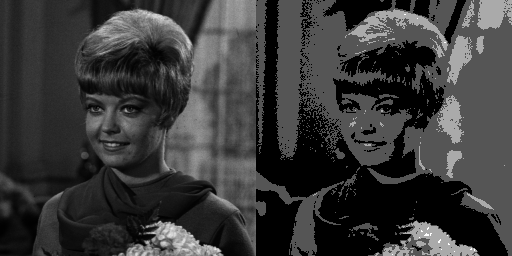

In [8]:
imgTgs2 = female1.copy()

bit_depth = 2
level = 255/ (pow (2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/Colab Notebooks/Assets/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape,original.dtype)

for i in range(original.shape[0]):
  for j in range(original.shape[1]):
    depth_image[i,j] = round((original[i,j]/level))*level

final_frame = cv.hconcat((original,depth_image))
cv2_imshow(final_frame)

3. Buat modul Average Denoising

In [9]:
import glob
imgTgs3 = []
for img in glob.glob('/content/drive/MyDrive/Colab Notebooks/Assets/noises/*.jpg'):
  n= cv.imread(img)
  imgTgs3.append(n)

In [10]:
def PNSR(img1,img2):
  mse = np.mean((img1-img2)**2)
  if mse == 0:
    return 100
  max_pixel = 255.0
  psnr = 20*np.log10(max_pixel/np.sqrt(mse))
  return psnr

def averageDenoising(index):
  avgDen = np.zeros_like(imgTgs3[0], dtype=np.float32)
  for i in range(index):
    avgDen += imgTgs3[i].astype(np.float32)

  return avgDen

5 Jumlah Citra di Average

29.110491023411342


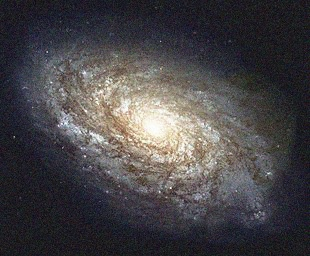

In [11]:
avgDen5 = averageDenoising(5)
avgDen5 /= 5
avgDen5 = np.uint8(avgDen5)
print(PNSR(imgTgs3[0],avgDen5))
cv2_imshow(avgDen5)

10 Jumlah Citra di Average

29.00919664533026


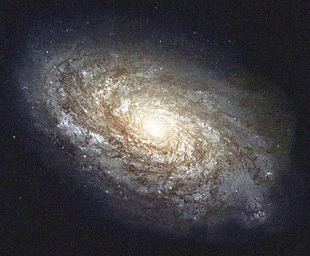

In [12]:
avgDen10 = averageDenoising(10)
avgDen10 /= 10
avgDen10 = np.uint8(avgDen10)
print(PNSR(imgTgs3[0],avgDen10))
cv2_imshow(avgDen10)

20 Jumlah Citra di Average

28.96351527526338


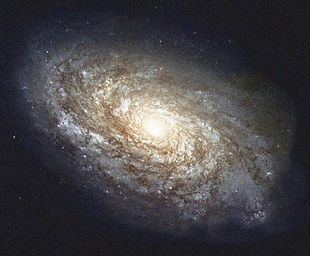

In [13]:
avgDen20 = averageDenoising(20)
avgDen20 /= 20
avgDen20 = np.uint8(avgDen20)
print(PNSR(imgTgs3[0],avgDen20))
cv2_imshow(avgDen20)

40 Jumlah Citra di Average

28.93296916141592


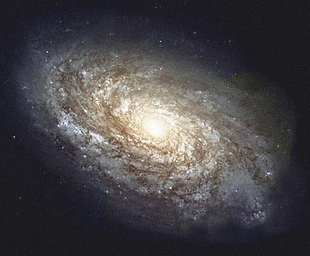

In [14]:
avgDen40 = averageDenoising(40)
avgDen40 /= 40
avgDen40 = np.uint8(avgDen40)
print(PNSR(imgTgs3[0],avgDen40))
cv2_imshow(avgDen40)

80 Jumlah Citra di Average

28.902235052388654


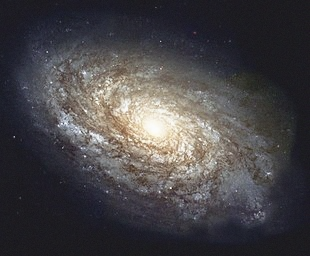

In [15]:
avgDen80 = averageDenoising(80)
avgDen80 /= 80
avgDen80 = np.uint8(avgDen80)
print(PNSR(imgTgs3[0],avgDen80))
cv2_imshow(avgDen80)

100 Jumlah Citra di Average

28.898562821305823


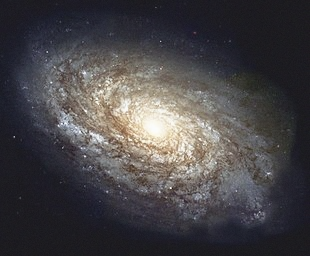

In [16]:
avgDen100 = averageDenoising(100)
avgDen100 /= 100
avgDen100 = np.uint8(avgDen100)
print(PNSR(imgTgs3[0],avgDen100))
cv2_imshow(avgDen100)

Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah peningkatan jumlah citra yang di-average tidak menjamin peningkatan kualitas citra, terutama jika ada ketidaksesuaian dalam distribusi noise pada gambar-gambar tersebut.

4. Buat image masking untuk image berikut

In [17]:
couple = cv.imread('/content/drive/MyDrive/Colab Notebooks/Assets/couple.tiff')

imgTgs4 = couple.copy()
imgTgs4 = cv.cvtColor(imgTgs4, cv.COLOR_BGR2RGB)

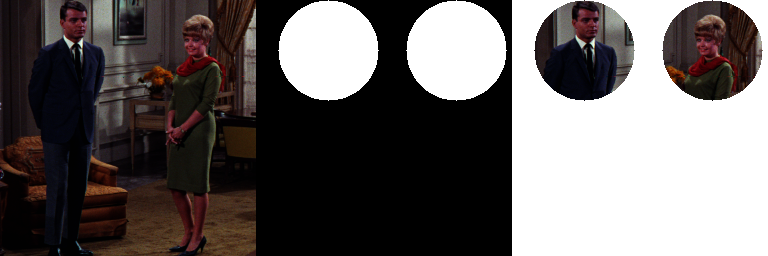

In [18]:
maskingImg = np.zeros(imgTgs4.shape, dtype=np.uint8)
maskingImg = cv.circle(maskingImg, (72, 50), 50, (255,255,255), -1)
maskingImg = cv.circle(maskingImg, (200, 50), 50, (255,255,255), -1)

result = cv.bitwise_and(imgTgs4, maskingImg)
result[maskingImg==0] = 255

imgTgs4 = cv.cvtColor(imgTgs4, cv.COLOR_BGR2RGB)
result = cv.cvtColor(result, cv.COLOR_BGR2RGB)
cv2_imshow(cv.hconcat([imgTgs4, maskingImg, result]))

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

NOT
(komplemen)

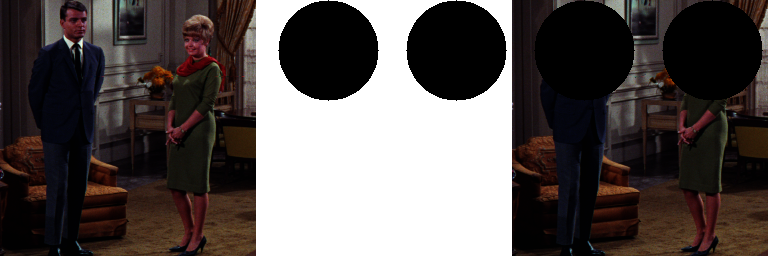

In [19]:
maskingImgNot = np.zeros(imgTgs4.shape[:2], dtype=np.uint8)

maskingImgNot = cv.circle(maskingImgNot, (72, 50), 50, 255, -1)
maskingImgNot = cv.circle(maskingImgNot, (200, 50), 50, 255, -1)

combine = cv.bitwise_not(maskingImgNot)

result = cv.bitwise_and(imgTgs4, imgTgs4, mask=combine)

combine = cv.cvtColor(combine, cv.COLOR_GRAY2BGR)

cv2_imshow(cv.hconcat([imgTgs4, combine, result]))

OR (Atau)

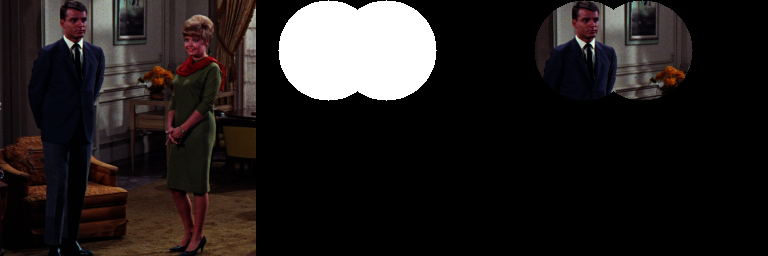

In [20]:
maskingImgOr = np.zeros(imgTgs4.shape[:2], dtype=np.uint8)
maskingImgOr2 = np.zeros(imgTgs4.shape[:2], dtype=np.uint8)

maskingImgOr = cv.circle(maskingImgOr, (72, 50), 50, 255, -1)
maskingImgOr2 = cv.circle(maskingImgOr2, (130, 50), 50, 255, -1)

combine = cv.bitwise_or(maskingImgOr, maskingImgOr2)

result = cv.bitwise_and(imgTgs4, imgTgs4, mask=combine)

combine = cv.cvtColor(combine, cv.COLOR_GRAY2BGR)

cv2_imshow(cv.hconcat([imgTgs4, combine, result]))

AND (Dan)

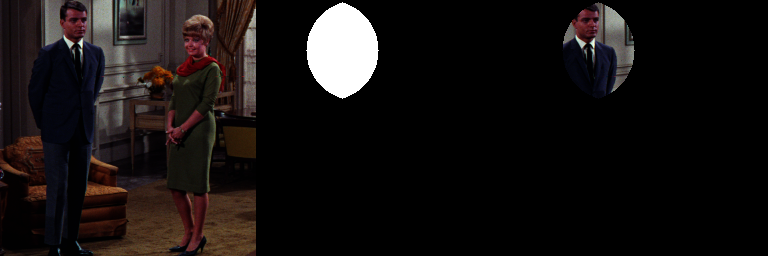

In [21]:
maskingImgAnd = np.zeros(imgTgs4.shape[:2], dtype=np.uint8)
maskingImgAnd2 = np.zeros(imgTgs4.shape[:2], dtype=np.uint8)

maskingImgAnd = cv.circle(maskingImgAnd, (72, 50), 50, 255, -1)
maskingImgAnd2 = cv.circle(maskingImgAnd2, (100, 50), 50, 255, -1)

combine = cv.bitwise_and(maskingImgAnd, maskingImgAnd2)

result = cv.bitwise_and(imgTgs4, imgTgs4, mask=combine)

combine = cv.cvtColor(combine, cv.COLOR_GRAY2BGR)

cv2_imshow(cv.hconcat([imgTgs4, combine, result]))

NAND (Not
And)

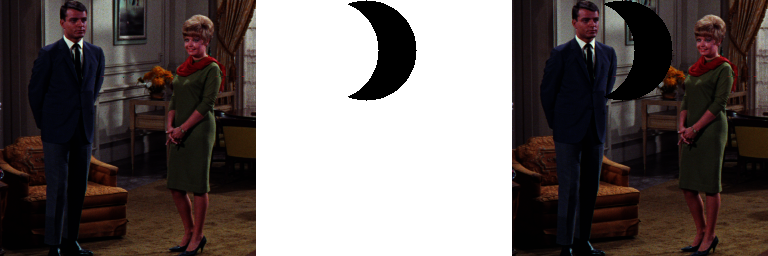

In [22]:
maskingImgNand = np.zeros(imgTgs4.shape[:2], dtype=np.uint8)
maskingImgNand2 = np.zeros(imgTgs4.shape[:2], dtype=np.uint8)

maskingImgNand = cv.circle(maskingImgNand, (72, 50), 50, 255, -1)
maskingImgNand2 = cv.circle(maskingImgNand2, (110, 50), 50, 255, -1)

combine = cv.bitwise_or(maskingImgNand, cv.bitwise_not(maskingImgNand2))

result = cv.bitwise_and(imgTgs4, imgTgs4, mask=combine)

combine = cv.cvtColor(combine, cv.COLOR_GRAY2BGR)

cv2_imshow(cv.hconcat([imgTgs4, combine, result]))

XOR
(Exlusive Or)

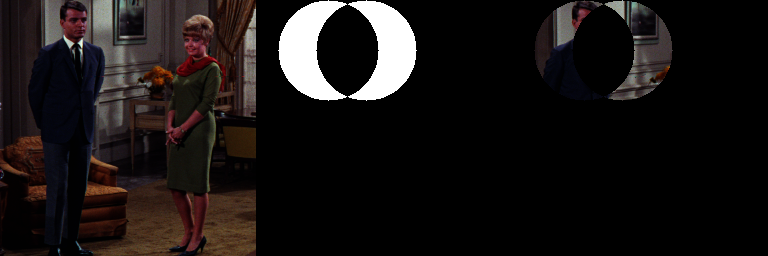

In [23]:
maskingImgXor = np.zeros(imgTgs4.shape[:2], dtype=np.uint8)
maskingImgXor2 = np.zeros(imgTgs4.shape[:2], dtype=np.uint8)

maskingImgXor = cv.circle(maskingImgXor, (72, 50), 50, 255, -1)
maskingImgXor2 = cv.circle(maskingImgXor2, (110, 50), 50, 255, -1)

combine = cv.bitwise_xor(maskingImgXor, maskingImgXor2)

result = cv.bitwise_and(imgTgs4, imgTgs4, mask=combine)

combine = cv.cvtColor(combine, cv.COLOR_GRAY2BGR)

cv2_imshow(cv.hconcat([imgTgs4, combine, result]))

Tuliskan hasil analisa anda:

- Untuk operator NOT (Komplemen) area di luar lingkaran akan dipertahankan dari citra asli, sedangkan area dalam lingkaran akan menjadi hitam karena mask yang terinversi.

- Untuk operator OR (Atau) lingkaran berwarna putih dan area di dalam lingkaran anak menunjukkan citra asli sedangkan area diluar lingkaran akan menjadi hitam.

- Untuk operator AND (Dan) hanya area di mana kedua lingkaran tumpang tindih yang muncul berwarna putih, menunjukkan bahwa operator AND hanya mengambil bagian yang berada di kedua mask sekaligus.

- Untuk operator NAND (Not And) area tumpang tindih dari lingkaran dihilangkan (berwarna hitam), sedangkan bagian lain tetap terlihat.

- Untuk operator XOR (Exclusive Or) bagian di luar irisan (hanya salah satu lingkaran) muncul sebagai warna putih, menunjukkan bahwa operator XOR mengambil bagian yang unik untuk masing-masing mask.